# Capitulo 3. Clasificación

Proyecto de clasificación, para diagnosticar medicamenttos basándose en las caracteristicas de los pacientes.

## <span style="color:green">1. Descargar los datos 📉</span>

EN ESTE PROYECTO SOLO VAMOS A NECESITAR LA BASE DE DATOS drug300.csv.💊

https://github.com/a2Proyectos/MachineLearning_Data



In [1]:
# Importa las librerias <3 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Define una función para extraer los datos
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/"
#Complementos con la dirección especifica de la base de datos que queremos.
MEDICAMENTOS = "Capitulo_3/drug200.csv"

In [3]:
# Visualiza el DataFrame
df = pd.read_csv(DOWNLOAD_ROOT + MEDICAMENTOS)

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
# Obten información de los datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.min()

Age               15
Sex                F
BP              HIGH
Cholesterol     HIGH
Na_to_K        6.269
Drug           DrugY
dtype: object

In [7]:
df.max()

Age                74
Sex                 M
BP             NORMAL
Cholesterol    NORMAL
Na_to_K        38.247
Drug            drugX
dtype: object

## <span style="color:green">2. Análisis de cada Variable</span>

<Figure size 900x500 with 0 Axes>

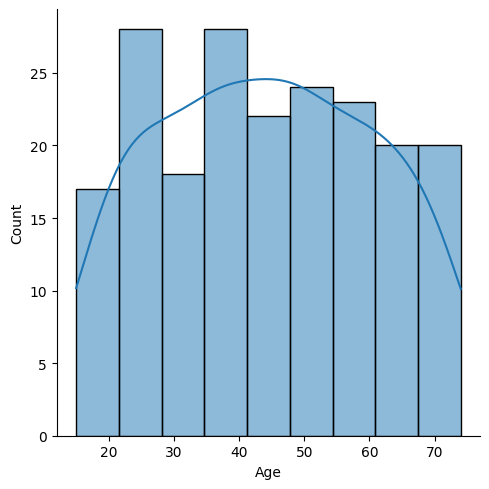

In [8]:
#Graficar la variable 
#Establece una área de figsize(9,5) es decir, el tamaño de la imagen
plt.figure(figsize=(9,5))
#Crea un displot para de la edad (por ser una variable numérica)
sns.displot(df.Age, kde=True) # kernel density estimation

In [9]:
# Género: cuenta cuántos hombres y mujeres hay
df.Sex.value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

In [10]:
# Crea una gráfica de barras para Presión Sanguinea
df.BP.value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

<Axes: xlabel='BP', ylabel='Count'>

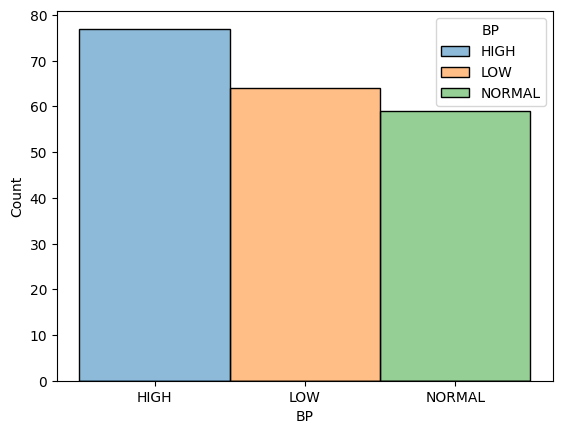

In [11]:
# Crea una gráfica de barras para Colesterol
# plt.figure(figsize=(9,5))
sns.histplot(data=df, x="BP", hue="BP") # hue ->color

In [12]:
df.Cholesterol.value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

<Axes: xlabel='Na_to_K', ylabel='Count'>

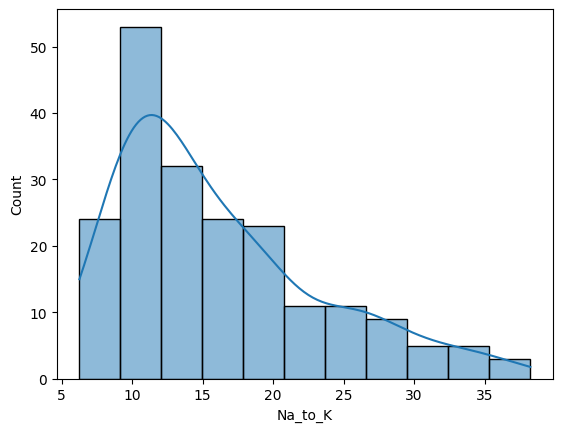

In [13]:
# Crea un displot para Sodio Potasio
sns.histplot(df.Na_to_K , kde=True)

<Axes: xlabel='Drug', ylabel='Count'>

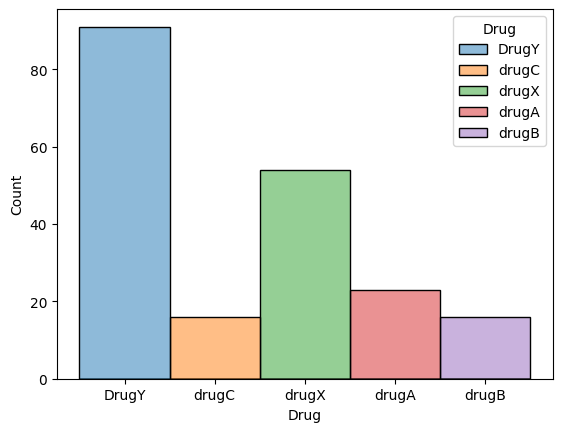

In [14]:
# Crea una gráfica de barras para los Medicamentos (droga) 💊

#Cuenta los medicamentos
sns.histplot(df, x="Drug", hue="Drug")

***

## <span style="color:green">3. Análisis de Relación entre Variables</span>


Text(0.5, 1.0, 'Edad vs Medicamento')

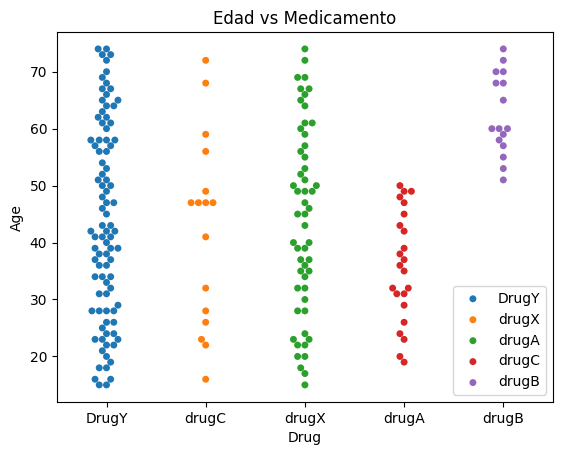

In [15]:
## Grafica (con swarmplot) la relación entre la Edad y los Medicamentos que se les da acorde a 💊
sns.swarmplot(x="Drug", y="Age", data= df, hue="Drug")
plt.legend(df.Drug.value_counts().index)
plt.title("Edad vs Medicamento")

In [16]:
# Grafica la relación entre el el Género y los Medicamentos 💊 que se les da
#Primero armar una tablita para poder graficarlas
df_sex_drugs = df.groupby(["Drug", "Sex"]).size().reset_index(name="Count")
df_sex_drugs

,Drug,Sex,Count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


<Axes: xlabel='Drug', ylabel='Count'>

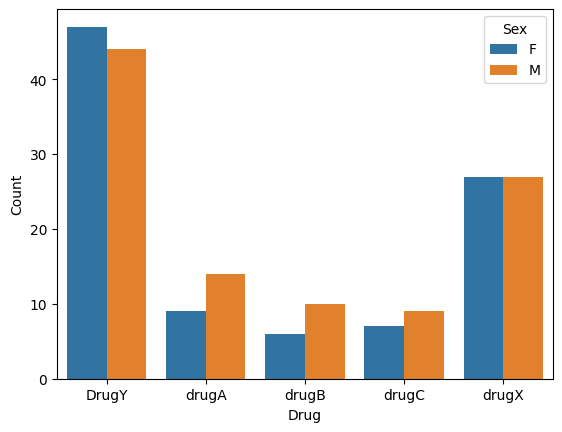

In [17]:
#Grafica la tablita anterior con una gráfica de barras
sns.barplot(x="Drug", y="Count", hue= "Sex", data= df_sex_drugs)

In [18]:
# Grafica la relación entre la Presión Sanguínea y los Medicamentos 💊
df_bp_drug = df.groupby(["Drug", "BP"]).size().reset_index(name="Count")
df_bp_drug

,Drug,BP,Count
0,DrugY,HIGH,38
1,DrugY,LOW,30
2,DrugY,NORMAL,23
3,drugA,HIGH,23
4,drugB,HIGH,16
5,drugC,LOW,16
6,drugX,LOW,18
7,drugX,NORMAL,36


<Axes: xlabel='Drug', ylabel='Count'>

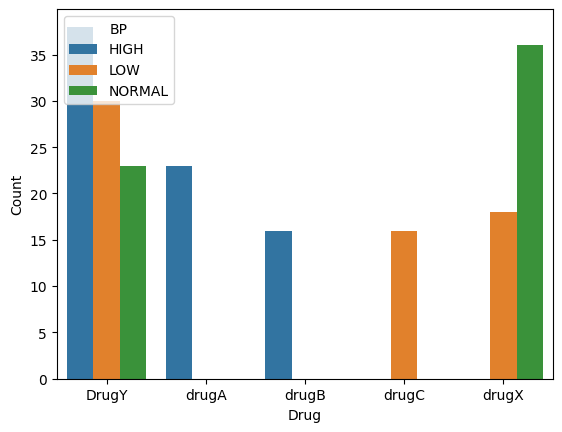

In [19]:
sns.barplot(x="Drug", y="Count", hue= "BP", data= df_bp_drug)

In [20]:
# Grafica (con una gráfica de barras)nla relación entre el nivel de colesterol y los medicamentos 💊
df_chol_drug = df.groupby(["Drug", "Cholesterol"]).size().reset_index(name="Count")
df_chol_drug

,Drug,Cholesterol,Count
0,DrugY,HIGH,47
1,DrugY,NORMAL,44
2,drugA,HIGH,12
3,drugA,NORMAL,11
4,drugB,HIGH,8
5,drugB,NORMAL,8
6,drugC,HIGH,16
7,drugX,HIGH,20
8,drugX,NORMAL,34


<Axes: xlabel='Drug', ylabel='Count'>

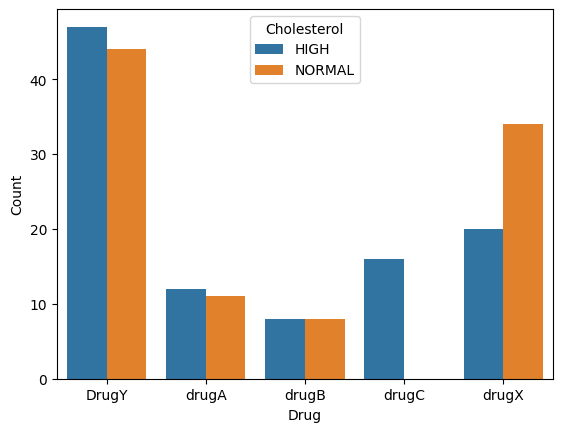

In [21]:
#Grafica (con un swarmplot) la relación entre el nivel de Sodio-Potasio y los medicamentos 💊 que se les da
sns.barplot(x="Drug", y="Count", hue= "Cholesterol", data= df_chol_drug)

Text(0.5, 1.0, 'Sodio-Potasio vs Medicamento')

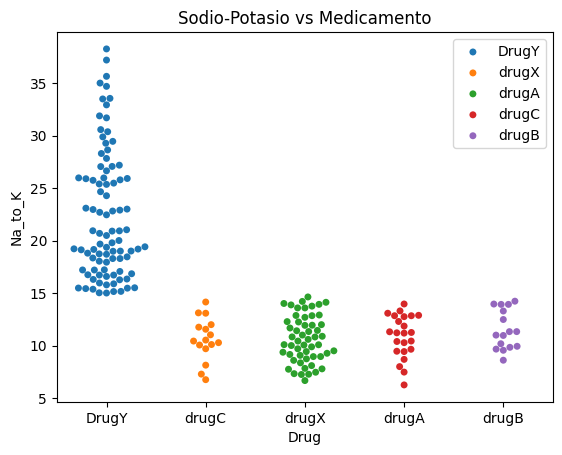

In [22]:
## Grafica (con swarmplot) la relación entre Sodio-Potasio y los Medicamentos que se les da acorde a 💊
sns.swarmplot(x="Drug", y="Na_to_K", data= df, hue="Drug")
plt.legend(df.Drug.value_counts().index)
plt.title("Sodio-Potasio vs Medicamento")

***

## <span style="color:green">4. Limpieza y Separación de Datos</span>


In [23]:
## Utilizar LabelEncoder para procesar variables alfanuméricas como el sexo, BP, Colesterol, étc
from sklearn.preprocessing import LabelEncoder

In [24]:
def label_encoder(data_category):
    le = LabelEncoder()
    df[data_category] = le.fit_transform(df[data_category])

In [25]:
variables = ["Sex", "BP", "Cholesterol", "Na_to_K", "Drug"]
for l in variables:
    label_encoder(l)

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,0
1,47,1,1,0,89,3
2,47,1,1,0,43,3
3,28,0,2,0,10,4
4,61,0,1,0,133,0


In [26]:
x = df.drop(["Drug"], axis=1)
y = df.Drug

In [27]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,167
1,47,1,1,0,89
2,47,1,1,0,43
3,28,0,2,0,10
4,61,0,1,0,133
...,...,...,...,...,...
195,56,0,1,0,69
196,16,1,1,0,75
197,52,1,2,0,36
198,23,1,2,1,102


In [28]:
y

0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int32

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# Crear set de entrenamiento y set de prueba
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42, shuffle=True)

El 20% de los datos, serán de prueba. Shuffle será true. Semilla de Aleatoriedad=42

***

## <span style="color:green">5. Modelo de Clasificación Binario</span>


In [31]:
## Crear modelo para medicamento Y
y_train_y = (y_train == 0)
y_test_y = (y_test == 0)

Empezaremos con la medicina Y porque es la más popular y, por ende la más fácil de predecir

In [32]:
## Modelo SGD= Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42)

In [33]:
# ajustamos el modelo al set de entrenamiento
sgd.fit(x_train, y_train_y)

SGDClassifier(random_state=42)

In [34]:
df.iloc[0]

Age             23
Sex              0
BP               0
Cholesterol      0
Na_to_K        167
Drug             0
Name: 0, dtype: int64

In [35]:
#Predecir la medicina a tomar de un humano que ya sepas el resultado 
sgd.predict([x_train.loc[0]]), y_train_y.loc[0]

c:\Users\GGudino\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


(array([ True]), True)

👀: para saber que le esta yendo bien al modelo tienen que coincidir los resultados

***

## <span style="color:green">6. Medidas de desempeño</span>


### <span style="color:blue">6.1 Exactitud</span>

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
# Realiza una Cross validation/K-Folds
cross_val_score(sgd, x_train, y_train_y, cv=3, scoring= "accuracy")

array([0.7962963 , 0.73584906, 0.71698113])

 
**cv:** número de dobleses 

**scoring:** accuracy (será nuestra medida de desempeño)  

In [38]:
# Modelo que nunca es Y
from sklearn.base import BaseEstimator
class NuncaC(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)
    
nunca_y = NuncaC()
cross_val_score(nunca_y, x_train, y_train_y, cv=3, scoring="accuracy")

array([0.57407407, 0.52830189, 0.47169811])

***

### <span style="color:blue">6.2 Matriz de Confusión</span>

In [39]:
# Matriz de confusión
#Importar cross_val_predict 
from sklearn.model_selection import cross_val_predict

In [40]:
y_train_pred = cross_val_predict(sgd,x_train, y_train_y,cv=3 )

In [41]:
y_train_pred

array([ True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True, False,  True, False,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True, False, False,
        True, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,

In [42]:
#Importar confusion_matrix
from sklearn.metrics import confusion_matrix

In [43]:
confusion_matrix(y_train_y, y_train_pred)

array([[44, 40],
       [ 0, 76]], dtype=int64)

<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*OhEnS-T54Cz0YSTl_c3Dwg.jpeg" alt="Data">

**Verdaderos Negativos**: esquina superior izquierda 

**Falsos positivos**: esquina superior derecha

**Falsos Negativos**: esquina inferior izquierda

**Verdaderos Positivos**: esquina inferior derecha 

***

### <span style="color:blue">6.3 Precision y Recall</span>

In [44]:
#Importar precision_score y recall_score 
from sklearn.metrics import precision_score, recall_score

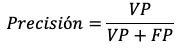

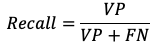

In [45]:
p = precision_score(y_train_y, y_train_pred)
r = recall_score(y_train_y, y_train_pred)
p,r

(0.6551724137931034, 1.0)

Alto **"PRECISION"**: Va a priorizar clasificar como True Positive cuando las probabilidades son altas, ante la duda lo deja afuera.

Alto **"RECALL"**: Va a tratar de que no quede nada afuera, siendo mas indulgente al momento de clasificar.

In [46]:
#Cambiar de clasificador
#Importar RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc = RandomForestClassifier(random_state=42)

In [48]:
rfc.fit(x_train, y_train_y)

RandomForestClassifier(random_state=42)

In [49]:
y_train_predict = cross_val_predict(rfc, x_train, y_train_y, cv=3)

In [50]:
#Hacer la matriz de confusión otra vez
confusion_matrix(y_train_y,y_train_predict)

array([[84,  0],
       [ 2, 74]], dtype=int64)

In [51]:
#Calcular la precisión y recall con el nuevo clasificador 
p = precision_score(y_train_y, y_train_predict)
r = recall_score(y_train_y, y_train_predict)
p,r

(1.0, 0.9736842105263158)

In [52]:
from sklearn.metrics import f1_score

In [53]:
#Calcular F1
f1_score(y_train_y, y_train_predict)

0.9866666666666666

<img src="https://www.shiksha.com/online-courses/articles/wp-content/uploads/sites/11/2022/12/image-29.png" alt="Data">

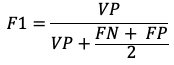

***

### <span style="color:blue">6.4 Umbral Precision y Recall</span>

In [54]:
#Puntación de un paciente aleatorio. En función de esta puntuación es lo que decidirá este algoritmo para clasificar la droga Y.
y_score = sgd.decision_function([x_train.loc[0]])
y_score

c:\Users\GGudino\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([40133.06685807])

In [55]:
# Aquí obtengo la puntuación de cada fila.
y_scores = cross_val_predict(sgd, x_train, y_train_y, cv=3, method= "decision_function")
y_scores

array([  7976.52148917, -17190.04776857,  -9964.25388585,  89235.04476991,
        68128.47940852,    419.53726942,  45461.42310616,  80635.78507772,
        14091.8536536 ,  17697.93197037,  -2041.01211691,  51757.93586673,
        -7922.56286695,  25338.68786361,  -5011.98425795,  64943.20763762,
       -35787.35928231, 100742.93489264,  48457.7215671 ,  75326.99879289,
        21950.80553359,  59963.66351138, -35101.6004668 ,  34937.36310226,
       -32356.61702631,  57062.82579465,  32209.91326786,  46123.80378023,
        27680.39836429,  -6104.91237017, -16640.66144478, -20490.2620682 ,
        17432.97970075,  21317.64753632,   3733.38881822,   9338.29822792,
        87970.67695381, -27082.89795365,  19724.03756165, -34635.9858165 ,
        -8994.06101618,  66351.74065925,  25560.78020727,  -6083.48240718,
       -10162.96808807,  15927.03775646, -19116.79625873,  -5736.71655044,
        41664.42330098,   -930.98746313,  76564.09211064,  54748.38979231,
        13809.22280656,  

In [56]:
#Graficar la precisión y recall. PRECISION RECALL CURVE.
from sklearn.metrics import precision_recall_curve

In [57]:
precisions, recalls, threshold = precision_recall_curve(y_train_y, y_scores)

In [58]:
import plotly.express as px
# import nbformat

In [59]:
df1 = pd.DataFrame({'Threshold': threshold, 'Precision': precisions[:-1], 'Recall': recalls[:-1]})
fig = px.line(df1, x='Threshold', y=['Precision', 'Recall'],
              labels={'value': 'Score'},
              line_dash_sequence=['solid', 'dash'],
              title='Precision & Recall vs Threshold')

fig.update_yaxes(tickvals=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
fig.show()

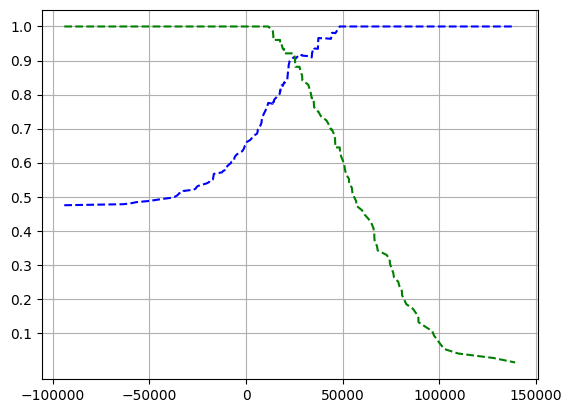

In [60]:
#Podemos visualizar los y_scores pero no nos dice nada, ¡la gráfica si lo hará!
#Graficamos la precisión y recall
plt.plot(threshold, precisions[:-1],"b--", label="Precision")
plt.plot(threshold, recalls[:-1],"g--", label="Recall")
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.grid()
plt.show()

El umbral te permite conocer qué medida priorizar acorde a tus objetivos. Ya sea que estemos hablando de videos de youtube para niños 🍭 o un sistema de seguridad 🔒.

In [61]:
#Supon que ya lo pensaste y querías un umbral  90 
umbral_90 = threshold[np.argmax(precisions >= 0.9)]
umbral_90

24575.640603301497

In [62]:
y_train_90 = (y_scores >= umbral_90)

In [63]:
#Arroja la precisión y recall para un umbral de 90
p = precision_score(y_train_y, y_train_90)
r = recall_score(y_train_y, y_train_90)
p,r

(0.9090909090909091, 0.9210526315789473)

***

### <span style="color:blue">6.5 Curva ROC</span>


Grafica Recall contra el porcentaje de Falsos Positivos

In [64]:
#Importar roc_curve
from sklearn.metrics import roc_curve

In [65]:
fpr, tpr, umbrales = roc_curve(y_train_y, y_scores)

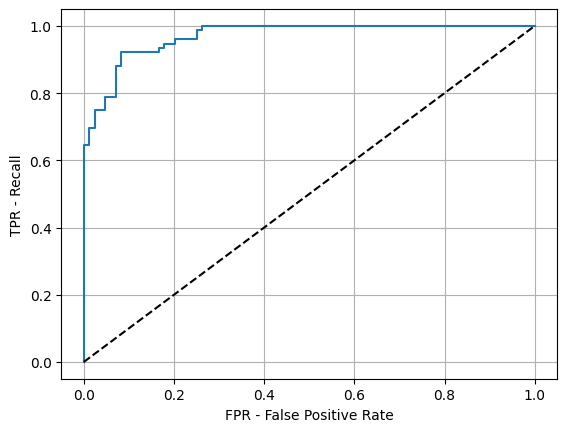

In [66]:
#Graficar la curva ROC
plt.plot(fpr, tpr, label= "ROC Curve")
#Poner una cuadrícula
plt.plot([0,1],[0,1], "k--")
plt.xlabel("FPR - False Positive Rate")
plt.ylabel("TPR - Recall")
plt.grid()
plt.show()

Un modelo perfecto se asimila a una escuadra entre la curva ROC y la línea punteada porque existe una mayor área bajo la curva

In [67]:
#Calcular el puntaje de la curva
from sklearn.metrics import roc_auc_score

In [68]:
roc_auc_score(y_train_y, y_scores)

0.9691416040100251

In [69]:
#Compararlo con el modelo de random forest
y_forest = cross_val_predict(rfc, x_train, y_train_y, cv= 3, method="predict_proba")
y_scores_forests = y_forest[:,1] #esto es porque solo queremos las probabilidades del medicamento Y

In [70]:
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_y, y_scores_forests)

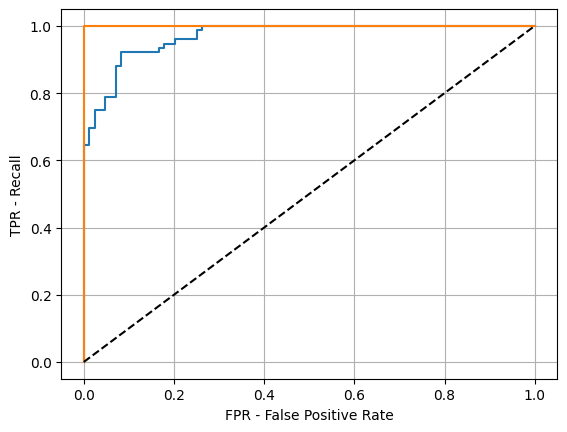

In [71]:
#Graficar la curva ROC y la predicción de random forest 
plt.plot(fpr, tpr, label= "ROC Curve") # lo comparamos con el GD
plt.plot(fpr_forest, tpr_forest, label= "ROC Curve")
#Poner una cuadrícula
plt.plot([0,1],[0,1], "k--")
plt.xlabel("FPR - False Positive Rate")
plt.ylabel("TPR - Recall")
plt.grid()
plt.show()

In [72]:
#Calcular el puntaje (área bajo la curva) de random forest  
roc_auc_score(y_train_y, y_scores_forests)

1.0

***

## <span style="color:green">7. Clasificadores Multiclase</span>


In [73]:
# Importar SVC=Support Vector Classifier
from sklearn.svm import SVC

In [74]:
svm = SVC()

In [75]:
svm.fit(x_train, y_train) #aquí el SVM utiliza el método uno vs uno (TIENE UN COSTO COMPUTACIONAL MAS CARO, A PESAR QUE ES MEJOR CLASIFICADOR QUE EL ONE VS REST)

SVC()

In [76]:
#Predecir a un humano aleatorio para ver que todo este funcionando bien 
svm.predict([x_train.loc[0]])

c:\Users\GGudino\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



array([0])

In [77]:
#Utilizar decision_function para observar los puntajes de cada medicina 
svm.decision_function([x_train.loc[0]]) #Decidirá por el qué tenga mayor puntaje

c:\Users\GGudino\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



array([[ 4.29314545,  1.79128957,  0.76838448, -0.27065817,  3.16462775]])

In [78]:
#Ahora, utiliza el clasificador one vs rest (todos) 
from sklearn.multiclass import OneVsRestClassifier

In [79]:
svm = OneVsRestClassifier(SVC()) # usando el algoritmo anterior le indicamos que utilice este método

In [80]:
#Predecir a un humano ahora con este clasificador
svm.fit(x_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [81]:
#Utilizar decision_function para observar los puntajes de cada medicina 
svm.predict([x_train.loc[0]])

c:\Users\GGudino\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

c:\Users\GGudino\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

c:\Users\GGudino\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

c:\Users\GGudino\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

c:\Users\GGudino\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



array([0])

In [82]:
#campararlo con los datos obtenidos de sgd.fit 
svm.decision_function([x_train.loc[0]])

c:\Users\GGudino\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

c:\Users\GGudino\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

c:\Users\GGudino\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

c:\Users\GGudino\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

c:\Users\GGudino\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



array([[ 2.31466773, -1.01816059, -1.01847764, -1.00071976, -1.08034559]])

In [83]:
sgd.fit(x_train, y_train)

SGDClassifier(random_state=42)

In [84]:
sgd.predict([x_train.loc[0]])

c:\Users\GGudino\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but SGDClassifier was fitted with feature names



array([0])

In [85]:
sgd.decision_function([x_train.loc[0]])

c:\Users\GGudino\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but SGDClassifier was fitted with feature names



array([[ 34119.59186544, -20230.79561182,  -7882.9384719 ,
        -11565.273663  ,  -8572.95224131]])

***

## <span style="color:green">8. Analizar Errores</span>

In [86]:
#Hacer un clasificador de random forest
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [87]:
y_train_pred = cross_val_predict(rfc, x_train, y_train, cv=3)

In [88]:
#Utilizar la matriz de confusión 
conf_mz = confusion_matrix(y_train, y_train_pred)

In [89]:
conf_mz

array([[75,  0,  0,  1,  0],
       [ 0, 17,  0,  0,  0],
       [ 0,  1, 12,  0,  0],
       [ 0,  0,  0,  7,  4],
       [ 0,  0,  0,  0, 43]], dtype=int64)

In [92]:
y_test_pred = rfc.predict(x_test)

In [93]:
conf_mz_test = confusion_matrix(y_test, y_test_pred)
conf_mz_test

array([[15,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  5,  0],
       [ 0,  0,  0,  0, 11]], dtype=int64)

In [95]:
#utilizar ahora SGD
y_train_pred = cross_val_predict(sgd, x_train, y_train, cv=3)
conf_mz = confusion_matrix(y_train, y_train_pred)
conf_mz

array([[61, 15,  0,  0,  0],
       [ 5, 10,  0,  0,  2],
       [ 3,  5,  1,  0,  4],
       [ 4,  5,  0,  0,  2],
       [16, 11,  1,  0, 15]], dtype=int64)

In [96]:
y_test_pred = sgd.predict(x_test)
conf_mz_test = confusion_matrix(y_test, y_test_pred)
conf_mz_test

array([[14,  0,  1,  0,  0],
       [ 2,  0,  4,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 1,  0,  2,  0,  2],
       [ 2,  0,  5,  0,  4]], dtype=int64)